In [1]:
----------------------------
# Impot Libraries
----------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over
                 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds
                 river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AG        proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks
                 by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's

In [2]:
----------------------------
# Load Data
----------------------------

housing = pd.read_csv('/content/Housing.csv')
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AG,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       501 non-null    float64
 6   AG       506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [4]:
housing['CHAS'].value_counts()

,count
CHAS,
0,471
1,35


In [5]:
housing.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AG,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,501.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.287557,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.703969,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.888000,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.209000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.625000,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


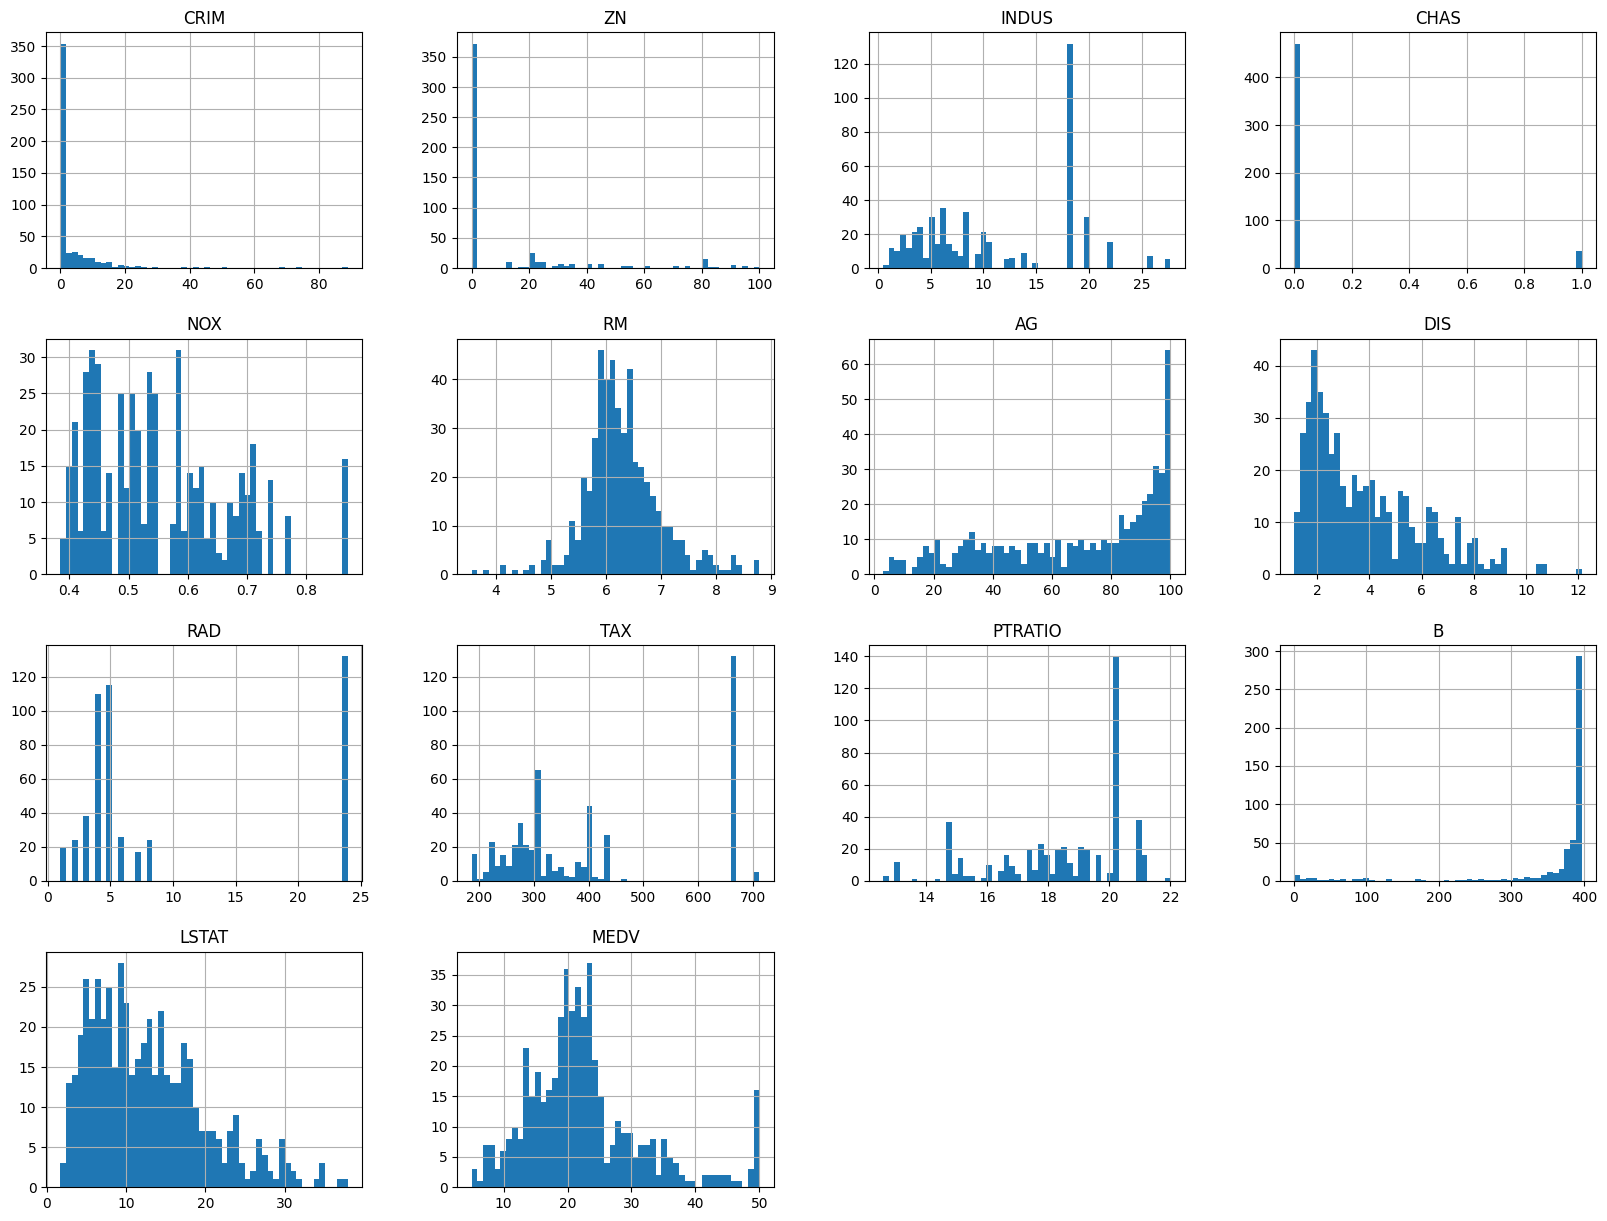

In [6]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

## Train Test Split

In [7]:

from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}\n")

# ya par humare pass 506 entry hai to humne 404 training and 102 testing ke liye
# split kar liya hai %%

Rows in train set: 404
Rows in test set: 102



In [8]:
# yaha ye is liye use hua hai kyu ki hume apne dataset me eqaul perposnal
# distribute karna hai jaise maan lo train set me [CHAS] 404 value hai use 0 aur 1
# me jo humko 0 ka 80 percent 1 ka 80 percent lena hai taki dono value bara bar
# ho 404 me se 376 : 0 and 28 : 1

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['CHAS']):
  strat_train_set = housing.loc[train_index]
  strat_test_set = housing.loc[test_index]

In [9]:
strat_test_set['CHAS'].value_counts()

,count
CHAS,
0,95
1,7


In [10]:
strat_train_set['CHAS'].value_counts()

,count
CHAS,
0,376
1,28


In [11]:
# Note ab yaha se hum ab train wale set par kaam karenge aur housing ka copy
# bana liya taki humare original dataset par effect na pade
housing = strat_train_set.copy()


## Looking For Correlation

In [12]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

,MEDV
MEDV,1.000000
RM,0.679402
B,0.361761
ZN,0.339741
DIS,0.240451
CHAS,0.205066
AG,-0.364596
RAD,-0.374693
CRIM,-0.393715
NOX,-0.422873


array([[<Axes: xlabel='MEDV', ylabel='MEDV'>,
        <Axes: xlabel='RM', ylabel='MEDV'>,
        <Axes: xlabel='ZN', ylabel='MEDV'>,
        <Axes: xlabel='LSTAT', ylabel='MEDV'>],
       [<Axes: xlabel='MEDV', ylabel='RM'>,
        <Axes: xlabel='RM', ylabel='RM'>,
        <Axes: xlabel='ZN', ylabel='RM'>,
        <Axes: xlabel='LSTAT', ylabel='RM'>],
       [<Axes: xlabel='MEDV', ylabel='ZN'>,
        <Axes: xlabel='RM', ylabel='ZN'>,
        <Axes: xlabel='ZN', ylabel='ZN'>,
        <Axes: xlabel='LSTAT', ylabel='ZN'>],
       [<Axes: xlabel='MEDV', ylabel='LSTAT'>,
        <Axes: xlabel='RM', ylabel='LSTAT'>,
        <Axes: xlabel='ZN', ylabel='LSTAT'>,
        <Axes: xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

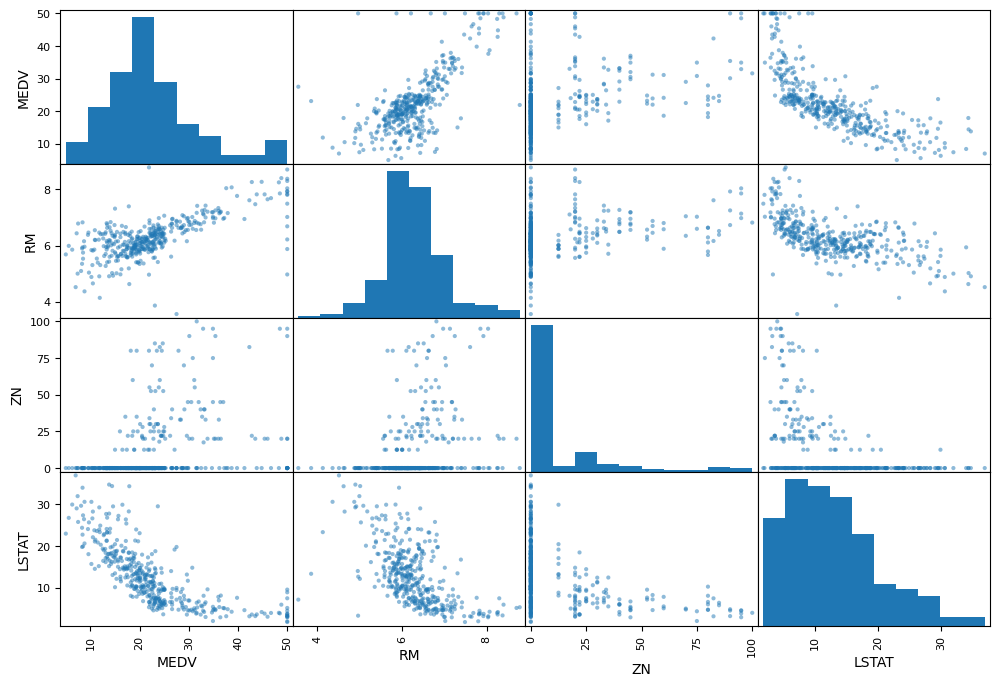

In [13]:
from pandas.plotting import scatter_matrix
attributes = ['MEDV','RM','ZN','LSTAT']
scatter_matrix(housing[attributes], figsize=(12,8))

<Axes: xlabel='RM', ylabel='MEDV'>

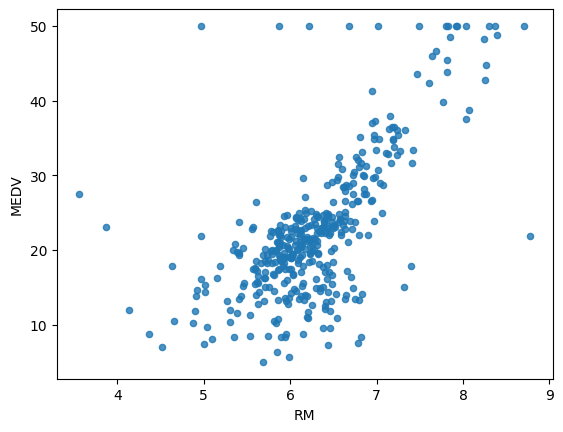

In [14]:
housing.plot(kind='scatter', x='RM', y='MEDV', alpha=0.8)

###Try out  Attribute Combinations

In [15]:
housing["TAXRM"] = housing['TAX']/housing['RM']

In [16]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AG,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [17]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

,MEDV
MEDV,1.000000
RM,0.679402
B,0.361761
ZN,0.339741
DIS,0.240451
CHAS,0.205066
AG,-0.364596
RAD,-0.374693
CRIM,-0.393715
NOX,-0.422873


<Axes: xlabel='TAXRM', ylabel='MEDV'>

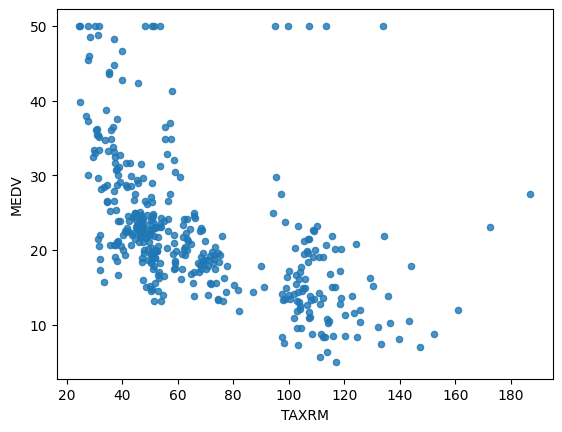

In [18]:
housing.plot(kind='scatter', x='TAXRM', y='MEDV', alpha=0.8)

In [19]:
# Yaha Humne MEDV ko drop kar liye hai kyu ki hum jb model bnate hai waha hume pattern ke trends ka find karna rahta
# to hum MEDV se pattern ko find karenge
housing = strat_train_set.drop("MEDV", axis=1)
housing_labels = strat_train_set["MEDV"].copy()

##Missing Attributes
 There are three type for solving missing Attributes
   1. jis row me missing hai us row ko poore field me se drop karwa do
   2. Jisme column me missing ho o column dropkar do agar important na ho
   3. mean, median and mode fill karna

    #option 1
    a = housing.dropna(subset=["RM"])
    a.shape
    # Note that the original housing dataframe will remain unchanged

    #option 2
    housing.drop("RM", axis = 1)
    # Note that there is no RM Column and also that the original housing dataframe will remain unchanged

    # Option 3
    meadian = housing["RM"].median()
    housing["RM"].fillna(meadian)
    # Note that the original housing dataframe will remain unchanged

Humne ye kewal practice ke liye likha hai but hum isme ek method ka use karenge SimpleImputer ka ye kisi bhi field me missing koi value hoga waha jo bhi staratgy lago waha fill kar dega(Automatically)


In [20]:
housing.describe()
# Note before we  started filling missing attributes
# RM me missing hai

,CRIM,ZN,INDUS,CHAS,NOX,RM,AG,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,400.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.281308,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.715281,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.212500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630250,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


In [21]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
imputer.fit(housing)
# Note This function use for Median for all column if any column have missing value then fit for all column

SimpleImputer(strategy='median')

In [22]:
imputer.statistics_ # sabhi column me median hai agar missing hai to fill hojayega automatically

array([2.86735e-01, 0.00000e+00, 9.90000e+00, 0.00000e+00, 5.38000e-01,
       6.21250e+00, 7.82000e+01, 3.12220e+00, 5.00000e+00, 3.37000e+02,
       1.90000e+01, 3.90955e+02, 1.15700e+01])

In [23]:
X = imputer.transform(housing) # yaha humne apne data ko X me tranform kar liya hai

In [24]:
housing_tr = pd.DataFrame(X, columns=housing.columns) # yaha humne housing_tr (tranform) ka dataframe bana liya hai

In [25]:
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AG,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280626,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711755,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086962,0.000000,5.190000,0.000000,0.453000,5.883000,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.212500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


##Scikit-learn Design

Primarily, Three types of object
1. Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method.
Fit method - fits the dataset and calculate internal parameters

2. Transformers- trasform method takes input and return output based on the learning from fit(). it also has a convenience function call fit_transform() which fits and then transform

3. Predictors- LinearRegression model is an example of predictor. fit() and predict() are two common function. it also gives score() function which will evalute the predictions

## Feature Scaling

Primarily two types of feature scling methods:
1. Min_max scaling (Normalization)
(value-min)/(max-min)
Sklearn provides a class called MinMaxScaler for this

2. Standardization (value - mean)/ std
Sklearn provides a class called StandardScaler for this


***Creating a Pipeline***

In [26]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    # yaha aur bhi add kar sakte hai ......
    ('std_scaler', StandardScaler())
])



In [27]:
housing_num_tr = my_pipeline.fit_transform(housing)

In [28]:
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

In [31]:
housing_num_tr.shape

(404, 13)

**Selecting a desired Model for Dragon Real Estates**

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , GradientBoostingRegressor
# model = LinearRegression()
# model = DecisionTreeRegressor()
model = RandomForestRegressor()
# model = GradientBoostingRegressor()

model.fit(housing_num_tr, housing_labels)

RandomForestRegressor()

In [116]:
# Hum apne model ko check karna chahte hai ki kaise work kar raha hai
# starting ke 5 data liye
# dono housing and housing_labels se aur compare kiye
some_data = housing.iloc[:5]

In [117]:
some_labels = housing_labels.iloc[:5]

In [118]:
prepared_data = my_pipeline.transform(some_data)

In [119]:
model.predict(prepared_data)

array([22.231, 25.399, 16.7  , 23.322, 23.528])

In [120]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

In [121]:
pd.DataFrame({'Predictions': model.predict(prepared_data), 'Labels': list(some_labels)})

,Predictions,Labels
0,22.231,21.9
1,25.399,24.5
2,16.700,16.7
3,23.322,23.1
4,23.528,23.0


In [122]:
from sklearn.metrics import mean_squared_error , r2_score
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rse = r2_score(housing_labels, housing_predictions)
rmse = np.sqrt(mse)
print("MSE: ", mse)
print("RMSE: ", rmse)
print("RSE: ", rse)

MSE:  1.3957399876237602
RMSE:  1.1814144013104633
RSE:  0.9841158818572143


**Using better evaluation technique - Cross Validation**

In [123]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

In [124]:
rmse_scores

array([2.7404563 , 2.83789547, 4.4543566 , 2.60051877, 3.45596987,
       2.5604815 , 4.98807543, 3.36876256, 3.43519104, 2.98506035])

In [125]:
def print_scores(scores):
  print("Scores:", scores)
  print("Mean: ", scores.mean())
  print("Standard Deviation: ", scores.std())

In [126]:
print_scores(rmse_scores)

Scores: [2.7404563  2.83789547 4.4543566  2.60051877 3.45596987 2.5604815
 4.98807543 3.36876256 3.43519104 2.98506035]
Mean:  3.342676788731332
Standard Deviation:  0.7663703142187952


## Saving the Model

In [127]:
# Yaha humne model banakar save kar liya dragon.joblib name se
# Ab humko kewal isko import karo aur predict karo
from joblib import dump, load
dump(model, 'Dragon.joblib')

['Dragon.joblib']

**Testing the Model**

  Ab hum final testing karenge jo humne pahle se testing ke liye data split kiya tha 20 percent uska use karke



In [128]:
X_test = strat_test_set.drop("MEDV", axis=1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)



In [129]:
# Error Check Karne ke liye
final_mse = mean_squared_error(Y_test, final_predictions)
final_rse = r2_score(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)


print("Mean Square Error :" ,final_mse)
print("Root Mean Square Error :" ,final_rse)
print("Square Mean Square Error :" ,final_rmse)


Mean Square Error : 8.630286960784305
Root Mean Square Error : 0.8780028388986756
Square Mean Square Error : 2.937735005201168


In [130]:
print(final_predictions)

[24.327 11.757 25.521 22.025 18.968 15.13  20.261 15.016 32.576 42.469
 19.581 11.41  23.698 28.9   19.698 11.246 32.089 13.938 23.679 18.753
 20.067 17.844 17.946 22.149 18.239 30.904 16.203 32.815  8.541 34.591
 23.75  21.47  22.792 11.098 20.915 11.159 42.7   24.321 23.762 41.917
 23.916 30.306 20.289 20.995 19.345 33.639 45.109 20.102 19.948 21.785
 20.919 14.737 21.541 15.057 24.763 33.334 43.28  29.33  19.688 20.697
 46.649 10.008 18.855 24.927 14.66  33.743 20.139 18.339 19.034 34.301
 25.929 23.031 21.778 21.989 34.96  13.446 16.197 20.349 20.813 21.318
 22.718 20.719 14.043 22.956 20.78  21.342 14.005 21.226 21.647 23.497
 18.29  27.696  7.422 26.123 19.317 29.312 19.506 31.374 14.853 27.078
 21.304 20.59 ]


In [131]:
pd.DataFrame({'Predictions': final_predictions, 'Labels': list(Y_test)})
# Compare Actual Vs Predicted

,Predictions,Labels
0,24.327,16.5
1,11.757,10.2
2,25.521,30.1
3,22.025,23.0
4,18.968,14.4
...,...,...
97,31.374,23.6
98,14.853,19.0
99,27.078,25.0
100,21.304,20.3


In [132]:
prepared_data[1]

array([-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
        0.49850479, -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
       -0.69277865,  0.39131918, -0.94116739])

In [133]:
# ye jb humko prediction karna ho hum is tarah karte hai dusra file bana kar
from joblib import dump, load
import numpy as np
model = load('Dragon.joblib')

In [134]:
features = np.array([[-0.44352175,  3.12628155, -1.35893781, -0.27288841, -1.0542567 ,
        0.49850479, -1.3938808 ,  2.19312325, -0.65766683, -0.78557904,
       -0.69277865,  0.39131918, -0.94116739]])

In [135]:
model.predict(features)

array([25.399])